In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
from matplotlib import cm
import matplotlib
from scipy import stats
import datetime
from constants import *

os.chdir(home_dir)
# plt.style.use(home_dir+'stylefile.mplstyle')

tmp = []
for i in range(len(fire_sn)):
    tmp.append(datetime.datetime.strptime(fire_sn['Ig_Date'][i], '%Y-%m-%d'))
fire_sn['dt'] = tmp

In [6]:
print(pe_data_dir)

/Users/marianne/documents/pe_snow_fires/data/


In [103]:
wfigs = gpd.read_file(pe_data_dir + 'WFIGS_Wildland_Fire_Perimeters_Full_History/FH_Perimeter.shp')
all_years = gpd.read_file(pe_data_dir + 'Interagency_Fire_Perimeter_History_All_Years/InteragencyFirePerimeterHistory.shp')

In [77]:
idxs = sn_wfigs.irwin_Cont.keys()
tmp = []
for i,x in enumerate(idxs):
    tmp.append(x)
sn_wfigs['count']=tmp



In [104]:
sn_allyears = gpd.sjoin(sn_watersheds,all_years)

In [117]:
sn_allyears

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,gnis_id,areaacres,areasqkm,states,...,UNIT_ID,POO_RESP_I,FEATURE_CA,GIS_ACRES,USER_NAME,SOURCE,AGENCY,FIRE_YEAR_,SHAPE_Leng,SHAPE_Area
0,{5AE4114D-8323-42BB-9F33-8B7C27B16203},None,None,None,None,2012-06-11,0.0,1198581.0,4850.592025,CA,...,STF,None,Final Wildfire Perimeter,380.170990,None,USFS,USFS,1915.0,0.054096,0.000158
0,{5AE4114D-8323-42BB-9F33-8B7C27B16203},None,None,None,None,2012-06-11,0.0,1198581.0,4850.592025,CA,...,STF,None,Final Wildfire Perimeter,5.798000,None,USFS,USFS,1960.0,0.006032,0.000002
0,{5AE4114D-8323-42BB-9F33-8B7C27B16203},None,None,None,None,2012-06-11,0.0,1198581.0,4850.592025,CA,...,STF,None,Final Wildfire Perimeter,2116.257080,None,USFS,USFS,1960.0,0.161393,0.000879
0,{5AE4114D-8323-42BB-9F33-8B7C27B16203},None,None,None,None,2012-06-11,0.0,1198581.0,4850.592025,CA,...,STF,None,Final Wildfire Perimeter,185.998993,None,USFS,USFS,1918.0,0.039244,0.000077
0,{5AE4114D-8323-42BB-9F33-8B7C27B16203},None,None,None,None,2012-06-11,0.0,1198581.0,4850.592025,CA,...,STF,None,Final Wildfire Perimeter,79.393997,None,USFS,USFS,1916.0,0.021942,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,{919052BE-A14A-457C-8C3B-F4A816379391},None,None,None,None,2012-06-11,0.0,775359.0,3137.835335,CA,...,PNF,None,Final Wildfire Perimeter,243.386002,None,USFS,USFS,1932.0,0.043458,0.000103
39,{919052BE-A14A-457C-8C3B-F4A816379391},None,None,None,None,2012-06-11,0.0,775359.0,3137.835335,CA,...,BTU,None,Final Wildfire Perimeter,1834.890015,None,USFS,USFS,2000.0,0.187692,0.000780
39,{919052BE-A14A-457C-8C3B-F4A816379391},None,None,None,None,2012-06-11,0.0,775359.0,3137.835335,CA,...,CABTU,None,Wildfire,1834.890015,None,CalFire FRAP,CDF,2000.0,0.187692,0.000780
39,{919052BE-A14A-457C-8C3B-F4A816379391},None,None,None,None,2012-06-11,0.0,775359.0,3137.835335,CA,...,PNF,None,Final Wildfire Perimeter,231.035995,None,USFS,USFS,1930.0,0.039716,0.000098


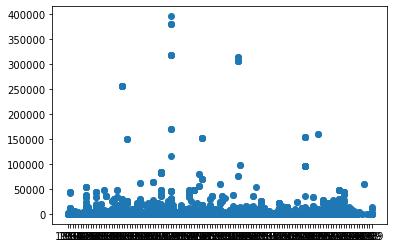

In [118]:
plt.plot(sn_allyears.FIRE_YEAR,sn_allyears.GIS_ACRES,'o')

In [91]:
# sn_wfigs = gpd.sjoin(wfigs,sn_watersheds)
tmp = []
for i in sn_wfigs.irwin_Cont.keys():
    try: tmp.append(datetime.datetime.strptime(sn_wfigs.irwin_Cont[i], '%Y-%m-%d'))
    except: tmp.append(np.nan)
sn_wfigs['dt'] = tmp

In [126]:
fire_sn.BurnBndAc

0       79978
1        2814
2       34459
3        1761
4       49588
        ...  
1017     1089
1018     1477
1019     3014
1020     3014
1021    12765
Name: BurnBndAc, Length: 1022, dtype: int64

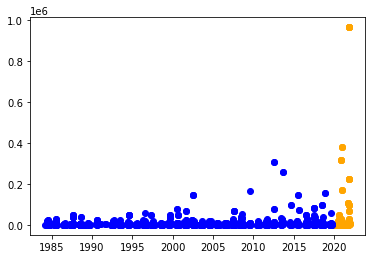

In [127]:
fig,ax=plt.subplots()
ax.plot(sn_wfigs.dt,sn_wfigs.poly_Acres,'o',color='orange')
ax.plot(fire_sn.dt,fire_sn.BurnBndAc,'o',color='blue')

In [150]:
vals = fire_sn.dt
fire_sn['year'] = [v.year for v in vals]
vals = sn_wfigs.dt
sn_wfigs['year'] = [v.year for v in vals]

In [151]:
yearly_acres = fire_sn.groupby(["year"])["BurnBndAc"].sum()
yearly_acres_recent = sn_wfigs.groupby(['year'])['poly_Acres'].sum()


In [164]:
yearly_acres = yearly_acres.append(yearly_acres_recent)
km2ac = 0.0040468564224
yearly_km = [yearly_acres[i]/km2ac for i in yearly_acres.keys()]

In [210]:
yearly_acres_list = yearly_acres.tolist()
yearly_acres_list = yearly_acres_list[0:37]
ac2km = 0.0040468564224

yearly_km_list = [v*ac2km for v in yearly_acres_list]

Text(0.5, 0, 'year')

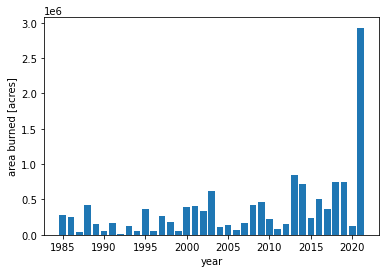

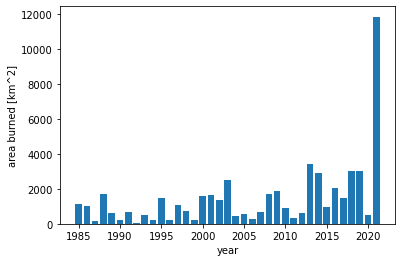

In [211]:
years = range(1985,2022)
fig,ax= plt.subplots()
ax.bar(years,yearly_acres_list[0:len(years)])
#  ax.bar(yearly_acres_recent.keys(),[yearly_acres_recent[i] for i in yearly_acres_recent.keys()])
ax.set_ylabel('area burned [acres]')
ax.set_xlabel('year')
# x.text(1990,4e6,'Sierra Nevada Only')

fig,ax= plt.subplots()
ax.bar(years,yearly_km_list[0:len(years)])
#  ax.bar(yearly_acres_recent.keys(),[yearly_acres_recent[i] for i in yearly_acres_recent.keys()])
ax.set_ylabel('area burned [km^2]')
ax.set_xlabel('year')


<AxesSubplot:>

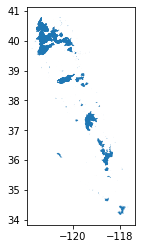

In [146]:
fig,ax= plt.subplots()
sn_wfigs.plot(ax=ax)

In [147]:
fire_sn.keys()

Index(['Event_ID', 'irwinID', 'Incid_Name', 'Incid_Type', 'Map_ID', 'Map_Prog',
       'Asmnt_Type', 'BurnBndAc', 'BurnBndLat', 'BurnBndLon', 'Ig_Date',
       'Pre_ID', 'Post_ID', 'Perim_ID', 'dNBR_offst', 'dNBR_stdDv', 'NoData_T',
       'IncGreen_T', 'Low_T', 'Mod_T', 'High_T', 'Comment', 'index_righ',
       'tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
       'loaddate', 'gnis_id', 'areaacres', 'areasqkm', 'states', 'huc8',
       'name', 'shape_star', 'shape_stle', 'index_ri_1', 'US_L3CODE',
       'US_L3NAME', 'NA_L3CODE', 'NA_L3NAME', 'NA_L2CODE', 'NA_L2NAME',
       'NA_L1CODE', 'NA_L1NAME', 'STATE_NAME', 'EPA_REGION', 'L3_KEY',
       'L2_KEY', 'L1_KEY', 'geometry', 'dt', 'year'],
      dtype='object')